In [0]:
# the following lines are only to run the code on google colab
!git clone https://github.com/reddybhargava/data_analytics_project-1.git
%cd /content/data_analytics_project-1

Cloning into 'data_analytics_project-1'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 134 (delta 55), reused 101 (delta 33), pack-reused 0
Receiving objects: 100% (134/134), 15.16 MiB | 5.05 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/data_analytics_project-1


## Importing Libraries

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from math import log
from functions import print_confusion_matrix
from functions import random_forest_classifier

%matplotlib inline

## Importing the dataset

In [0]:
path = '/content/data_analytics_project-1/dataset/'
train_values = pd.read_csv(path + 'train_values.csv')
train_labels = pd.read_csv(path + 'train_labels.csv')
test_values = pd.read_csv(path + 'test_values.csv')
submission = pd.read_csv(path + 'submission_format.csv')

## Understanding the dataset

In [0]:
train_values.shape

(260601, 39)

In [0]:
test_values.shape

(86868, 39)

In [0]:
train_values.head().transpose()

,0,1,2,3,4
building_id,802906,28830,94947,590882,201944
geo_level_1_id,6,8,21,22,11
geo_level_2_id,487,900,363,418,131
geo_level_3_id,12198,2812,8973,10694,1488
count_floors_pre_eq,2,2,2,2,3
age,30,10,10,10,30
area_percentage,6,8,5,6,8
height_percentage,5,7,5,5,9
land_surface_condition,t,o,t,t,t
foundation_type,r,r,r,r,r


In [0]:
train_values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

## Dataset Preprocessing

### Check for missing, NaN values

In [0]:
train_values.isnull().values.any()
train_labels.isnull().values.any()

#The dataset contains no missing values.

False

### Check for Outliers

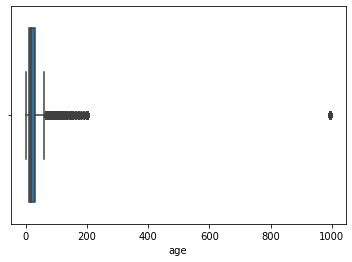

In [0]:
ax = sns.boxplot(x=train_values["age"])

Even though the boxplot for the age of the buildings shows outliers, according to other sources, the buildings in Nepal actually date back to several thousands of years.

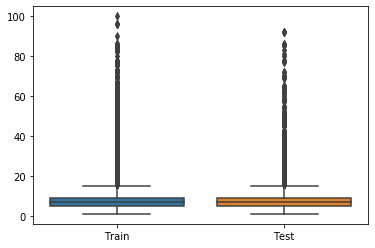

In [0]:
data = pd.DataFrame({ 'Train': train_values["area_percentage"], 'Test' : test_values["area_percentage"]})
ax = sns.boxplot(data=data)

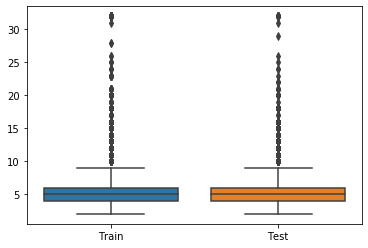

In [0]:
data = pd.DataFrame({ 'Train': train_values["height_percentage"], 'Test' : test_values["height_percentage"]})
ax = sns.boxplot(data=data)

We cannot eliminate all the outliers in the train data as the test data also contains outliers similar to the train data.

### Converting categorical variables into Numeric form

In [0]:
#Columns with categorical data
num_cols = train_values._get_numeric_data().columns
categories = list(set(train_values.columns) - set(num_cols))
categories

['foundation_type',
 'position',
 'land_surface_condition',
 'ground_floor_type',
 'roof_type',
 'plan_configuration',
 'legal_ownership_status',
 'other_floor_type']

In [0]:
for i in categories:
    print(i, set(train_values[i]))

foundation_type {'h', 'i', 'u', 'r', 'w'}
position {'o', 's', 'j', 't'}
land_surface_condition {'o', 'n', 't'}
ground_floor_type {'x', 'z', 'v', 'm', 'f'}
roof_type {'q', 'x', 'n'}
plan_configuration {'q', 'n', 'c', 'u', 'm', 'a', 'f', 'o', 'd', 's'}
legal_ownership_status {'w', 'v', 'r', 'a'}
other_floor_type {'q', 'j', 'x', 's'}


In [0]:
#One hot Encodings
train_values_new = pd.get_dummies(train_values)
test_values_new = pd.get_dummies(test_values)

print('Training dataset :',train_values_new.shape)
print()
print('Test dataset :',test_values_new.shape)

Training dataset : (260601, 69)

Test dataset : (86868, 69)


In [0]:
#Factors Method

#Preparing Training Data
df = train_values.copy(deep=True)
for col_name in categories:
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
print("Train Data Shape: ", df.shape)

#Preparing Test Data
df_test = test_values.copy(deep=True)
for col_name in categories:
        df_test[col_name]= df_test[col_name].astype('category')
        df_test[col_name] = df_test[col_name].cat.codes
print("Test Data Shape: ", df_test.shape)

Train Data Shape:  (260601, 39)
Test Data Shape:  (86868, 39)


### Basic Summary Statistic

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
land_surface_condition,260601.0,1.695427,0.696040,0.0,2.0,2.0,2.0,2.0
foundation_type,260601.0,2.119036,0.579154,0.0,2.0,2.0,2.0,4.0


### Dropping columns

In [0]:
binary_columns = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
                  'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                  'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
                  'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use', 'has_secondary_use_agriculture',
                  'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
                  'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police',
                  'has_secondary_use_other' ]

for col in binary_columns:
    # print(df[col].value_counts())
    print(col,":",np.var(df[col]))

drop_columns = df.loc[:, np.var(df) <= 0.02].columns
print("\nColumns to be dropped:")
print(drop_columns)

# dropping the columns
df = df.loc[:, np.var(df) > 0.02]
df_test.drop(drop_columns, axis=1, inplace=True)

has_superstructure_adobe_mud : 0.08078714086323414
has_superstructure_mud_mortar_stone : 0.1813901018804314
has_superstructure_stone_flag : 0.03315347984336047
has_superstructure_cement_mortar_stone : 0.01790226576325162
has_superstructure_mud_mortar_brick : 0.06350903044808923
has_superstructure_cement_mortar_brick : 0.06960300176379407
has_superstructure_timber : 0.18996887956745662
has_superstructure_bamboo : 0.07778428399137452
has_superstructure_rc_non_engineered : 0.04077610387062046
has_superstructure_rc_engineered : 0.015607970465356908
has_superstructure_other : 0.014760055268912435
has_secondary_use : 0.09936274681091337
has_secondary_use_agriculture : 0.060233569474115074
has_secondary_use_hotel : 0.03249540227081394
has_secondary_use_rental : 0.008034887938016846
has_secondary_use_institution : 0.0009392506822287749
has_secondary_use_school : 0.00036057457093382106
has_secondary_use_industry : 0.0010694559959168015
has_secondary_use_health_post : 0.00018799155291638012
has_

From the above output we can see that most of  ***has_secondary_use_*** columns and some of the ***has_superstructure_*** columns have very low variance/spread and also high imbalance. Hence these columns can be dropped for the further analysis.

### Saving the modified dataset

In [0]:
# Saving the modified datasets
path = '/content/data_analytics_project-1/dataset_modified/'
df.to_csv(path + 'train_values.csv', index = False)
train_labels.to_csv(path + 'train_labels.csv', index = False)
df_test.to_csv(path + 'test_values.csv', index = False)

## Exploratory Data Analysis

In [0]:
df[df.age>150]['age'].value_counts()

995    1390
200     106
180       7
170       6
160       6
175       5
190       3
195       2
165       2
185       1
155       1
Name: age, dtype: int64

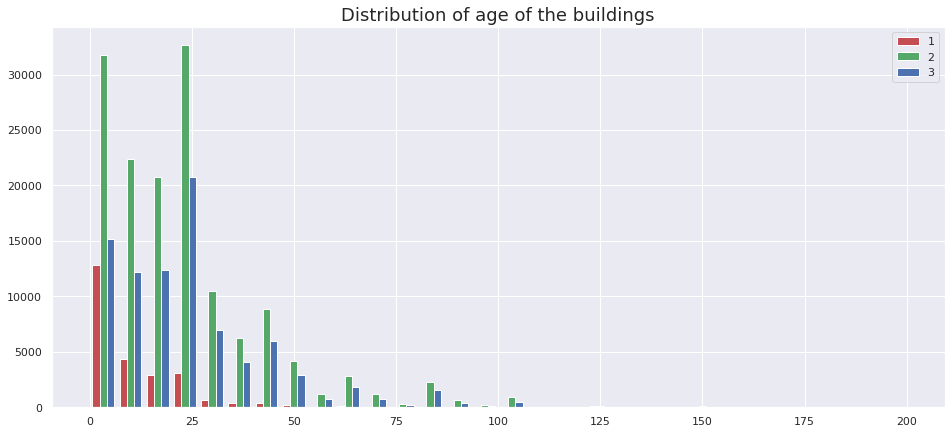

We can observe that almost all of the buildings of 25 years and older are only moderately or highly damaged


In [0]:
df_merged = train_values.merge(train_labels)
df_merged_age = df_merged[df.age<500]

damage_grade_1 = df_merged_age[df_merged_age.damage_grade==1]['age']
damage_grade_2 = df_merged_age[df_merged_age.damage_grade==2]['age']
damage_grade_3 = df_merged_age[df_merged_age.damage_grade==3]['age']

sns.set(rc={'figure.figsize':(16,7)})
plt.hist([damage_grade_1, damage_grade_2, damage_grade_3], color=['r','g','b'] ,bins = 30)
plt.legend(['1','2','3'])
plt.title('Distribution of age of the buildings', fontdict={'fontsize':18})
plt.show()
print('We can observe that almost all of the buildings of 25 years and older are only moderately or highly damaged')

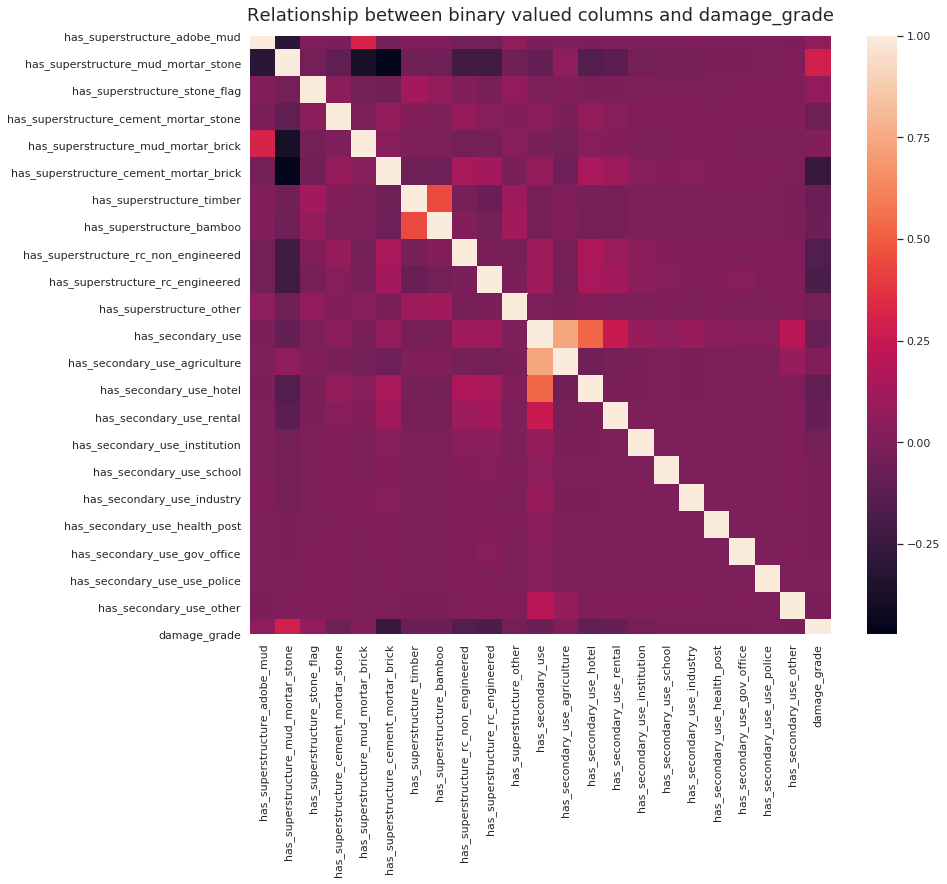

In [0]:
temp = train_values.merge(train_labels)
temp = temp[binary_columns+['damage_grade']]
plt.figure(figsize=(13,11))
data_corr = temp.corr()
sns.heatmap(data_corr)
plt.title('Relationship between binary valued columns and damage_grade', fontdict={'fontsize':18 }, pad=15)
plt.show();

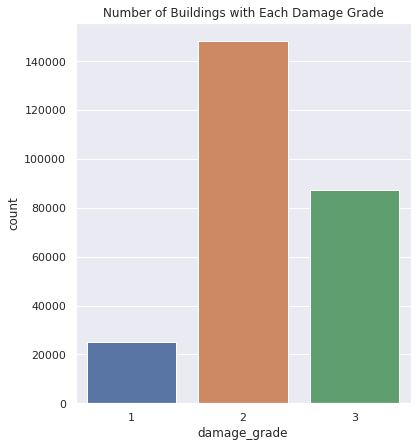

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

It can be clearly seen that most (about 56.89%) of the buildings have been moderately (damage_grade = 2) damaged by the earthquake


In [0]:
# On plotting a bar plot for each damage grade, we observe that the data is imbalanced.
# Countplot of 'damage_grade' column ( Counts of different damage grades )

sns.set(rc={'figure.figsize':(6,7)})
sns.countplot(train_labels['damage_grade']).set_title("Number of Buildings with Each Damage Grade")
plt.show()
damage_grade_count = train_labels['damage_grade'].value_counts()
print(damage_grade_count)
print()
print('It can be clearly seen that most (about %.2f%%) of the buildings have been moderately (damage_grade = 2) damaged by the earthquake' 
      %(round(damage_grade_count[2]/sum(damage_grade_count)*100,2)))

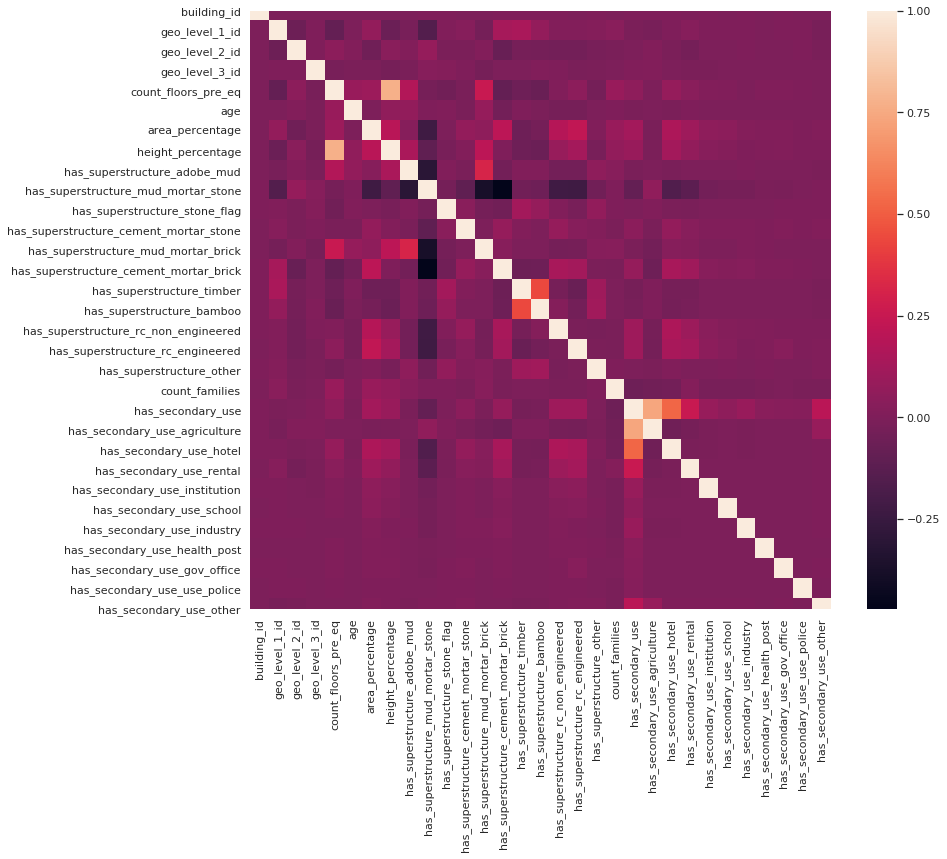

In [0]:
plt.figure(figsize=(13,11))
data_corr = train_values.corr()
sns.heatmap(data_corr)
plt.show();

The below plot shows relationship between a few selected columns and how they vary with one another


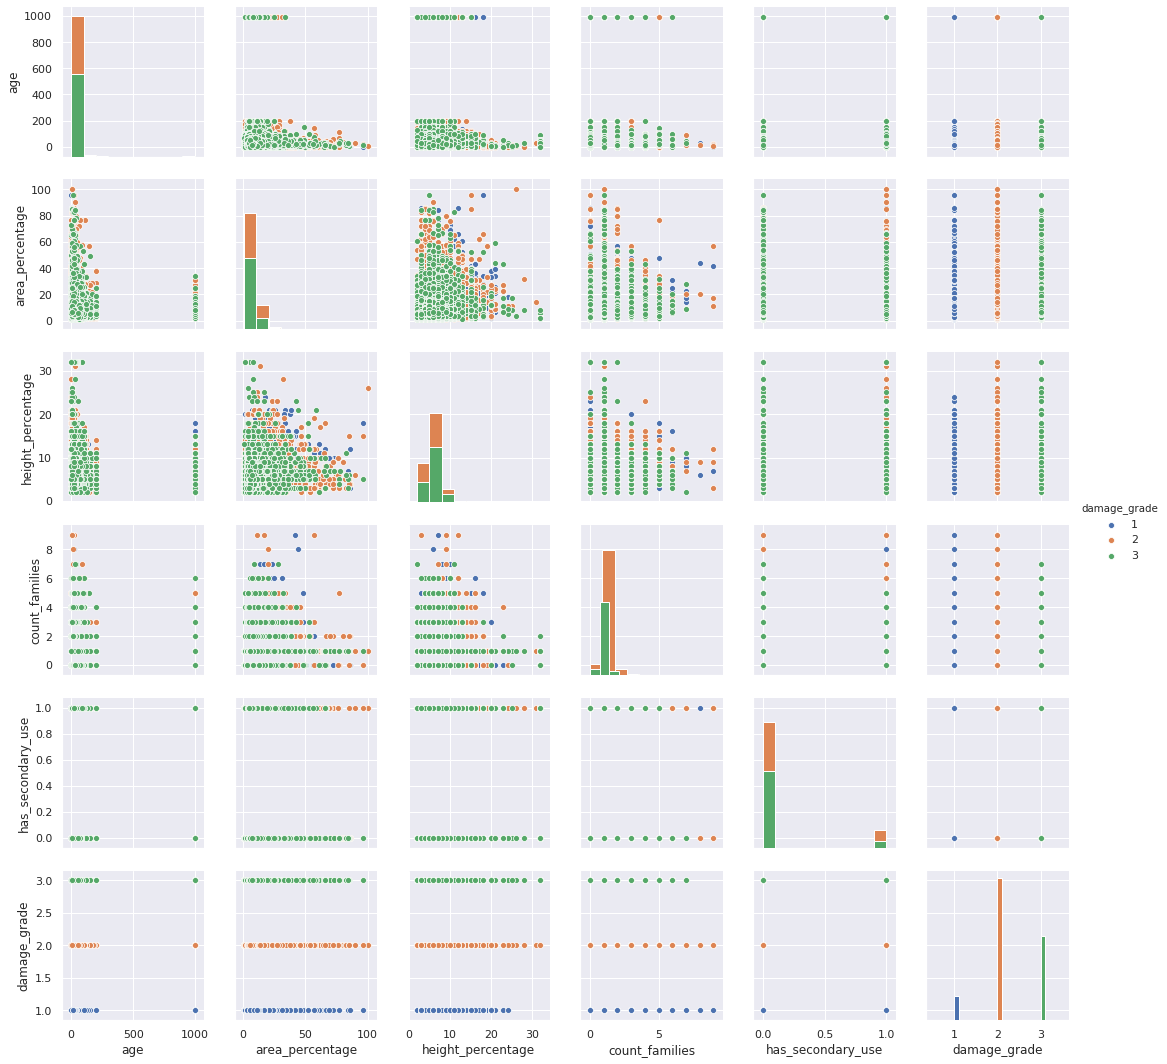

In [0]:
# Pairplot of a few selected columns

print('The below plot shows relationship between a few selected columns and how they vary with one another')
df_merged = train_values.merge(train_labels)
selected_features = ['age',
                 'area_percentage',
               'height_percentage',
               'foundation_type',
               'count_families',
               'has_secondary_use',
                'damage_grade']

df_merged_select = df_merged[selected_features]

sns.pairplot(data = df_merged_select, hue = "damage_grade", diag_kind = "hist", kind = "scatter")
plt.show()

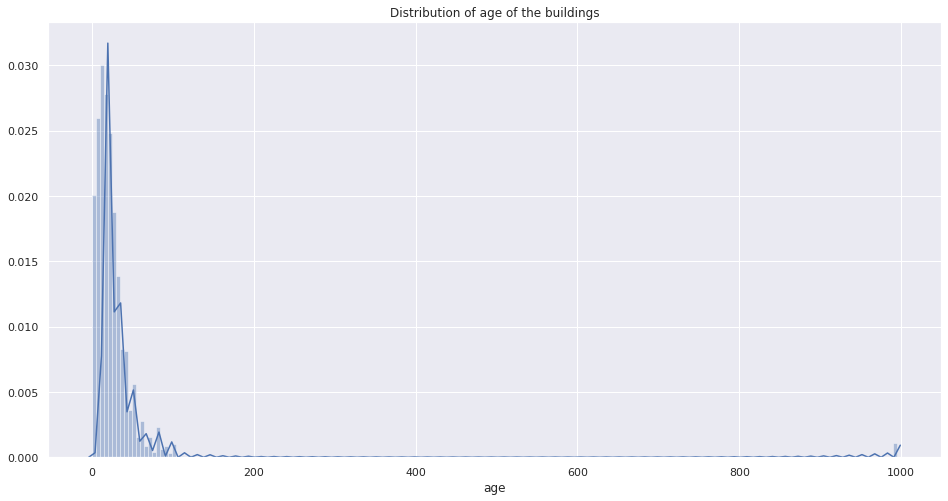

Number of zeros(in age column):  26041
26k zeros can imply two things, all those building were built in the past year(pretty unlikely) or that there were some unknown values and they have been filled with 0

From the above histogram we can infer that most of the buildings that were destroyed during the earthquake were new or recently build


In [0]:
# Histogram of 'age' column ( Distribution of age of the buildings )

sns.set(rc={'figure.figsize':(16,8)})
sns.distplot(df.age, bins = 200, kde = True)
plt.title('Distribution of age of the buildings')
plt.show()

# log transformation applied on age column for values greater than 0
# sns.set(rc={'figure.figsize':(16,8)})
# sns.distplot(df.age[df.age>0].apply(log), bins = 40, kde = True)
# plt.title('Distribution of age of the buildings after log transformation')
# plt.show()

num_of_zeros = df['age'].to_list().count(0)
print('Number of zeros(in age column): ',num_of_zeros)
print('26k zeros can imply two things, all those building were built in the past year(pretty unlikely) or that there were some unknown values and they have been filled with 0')
print()
print('From the above histogram we can infer that most of the buildings that were destroyed during the earthquake were new or recently build')

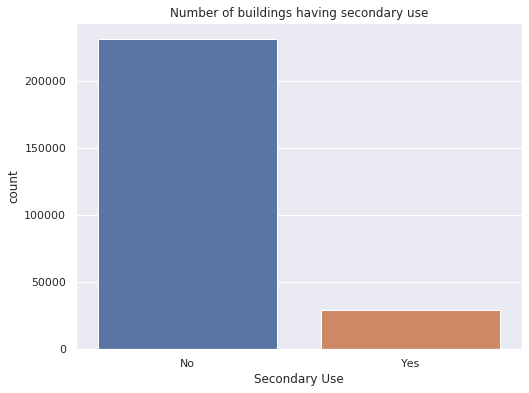

0    231445
1     29156
Name: has_secondary_use, dtype: int64

Only a small percentage (11.19%) of the buildings had a secondary use


In [0]:
# Countplot of 'has_secondary_use' column ( Number of buildings having secondary use )

sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(df['has_secondary_use'])
plt.title('Number of buildings having secondary use')
plt.xlabel('Secondary Use')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()
secondary_use_count = df['has_secondary_use'].value_counts()
print(secondary_use_count)
print()
print('Only a small percentage (%.2f%%) of the buildings had a secondary use' %(round(secondary_use_count[1]/len(df.has_secondary_use)*100,2)))

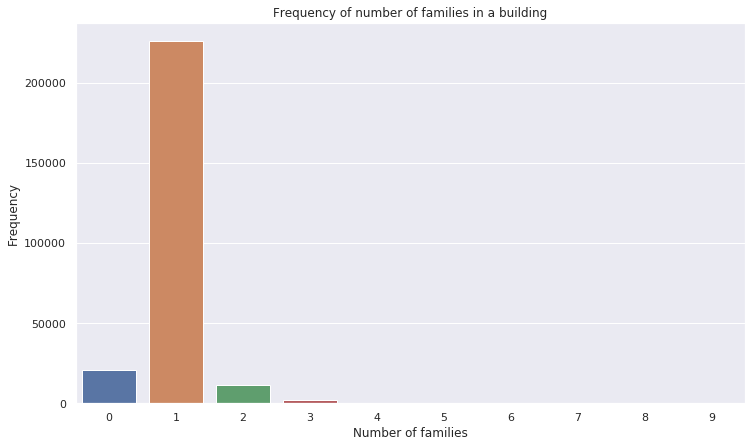

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Majority of the buildings (about 86.77%) had only 1 family living in them


In [0]:
# Countplot for 'count_families' column ( frequency of number of families )

sns.set(rc={'figure.figsize':(12,7)})
sns.countplot(df.count_families)
plt.title('Frequency of number of families in a building')
plt.xlabel('Number of families')
plt.ylabel('Frequency')
plt.show()
families_count = df['count_families'].value_counts()
print(families_count)
print()
print('Majority of the buildings (about %.2f%%) had only 1 family living in them' %(round((families_count[1]/len(df.count_families))*100,2)))

area_percentage represents the normalized area of the building footprint


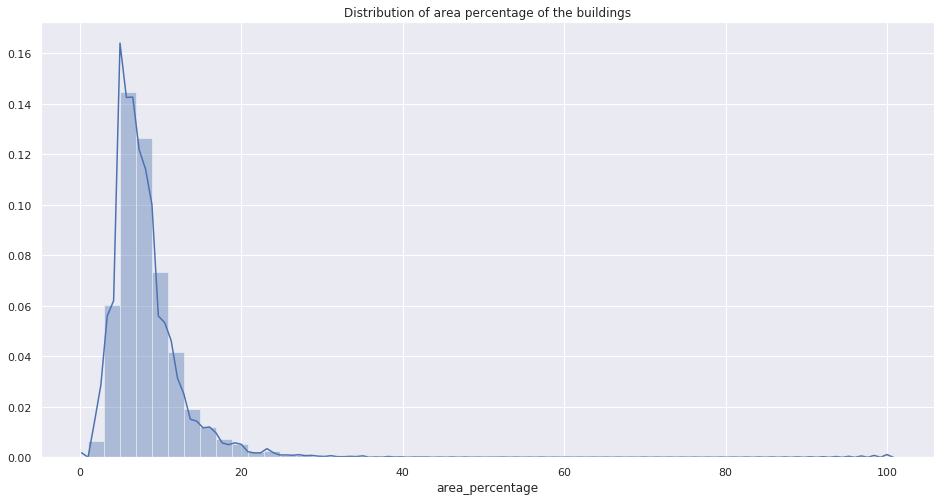

The above distribution of area percentage shows it is positively(right) skewed
So, we can use log transformation to make the distribution more normal



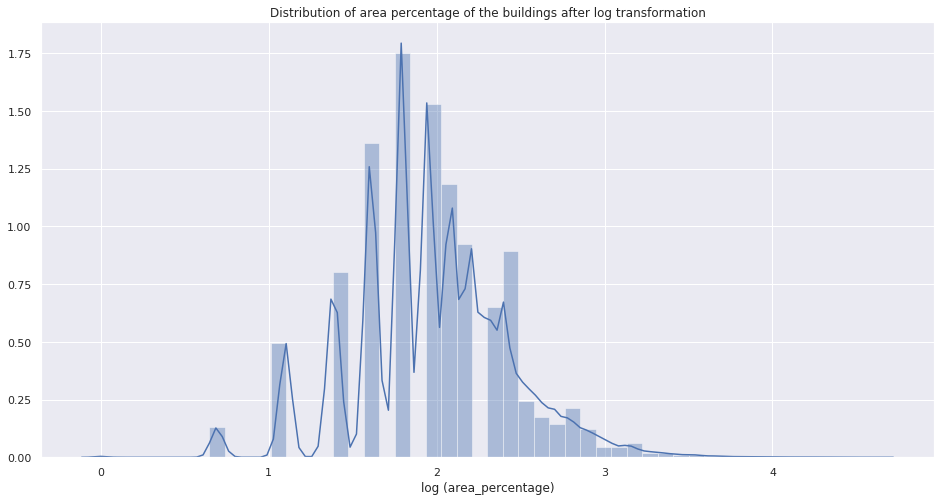

In [0]:
# Histogram of 'area_percentage' column   ( Distribution of area percentage of the buildings )

print('area_percentage represents the normalized area of the building footprint')
sns.set(rc={'figure.figsize':(16,8)})
sns.distplot(df.area_percentage)
plt.title('Distribution of area percentage of the buildings')
plt.show()
print('The above distribution of area percentage shows it is positively(right) skewed')
print('So, we can use log transformation to make the distribution more normal')
print()
sns.distplot(df.area_percentage.apply(log))
plt.title('Distribution of area percentage of the buildings after log transformation')
plt.xlabel('log (area_percentage)')
plt.show()


height_percentage represents the normalized height of the building footprint


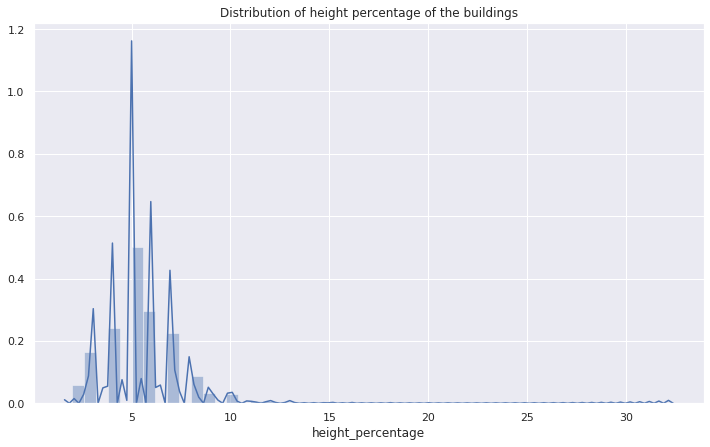

In [0]:
# Histogram of 'height_percentage' column  ( Distribution of height percentage of the buildings )

print('height_percentage represents the normalized height of the building footprint')
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(df.height_percentage)
plt.title('Distribution of height percentage of the buildings')
plt.show()


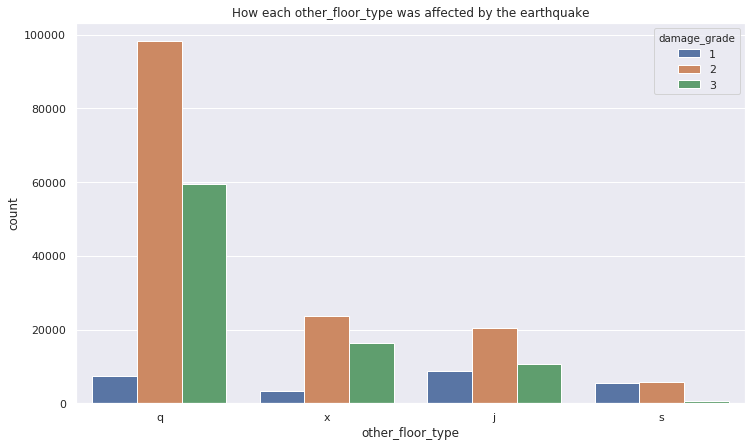

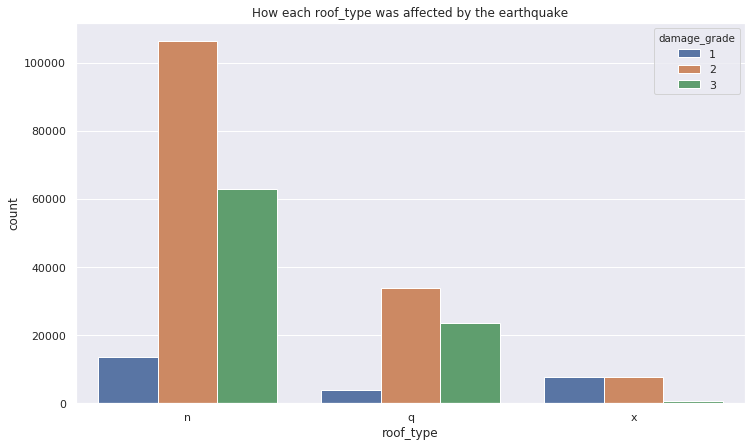

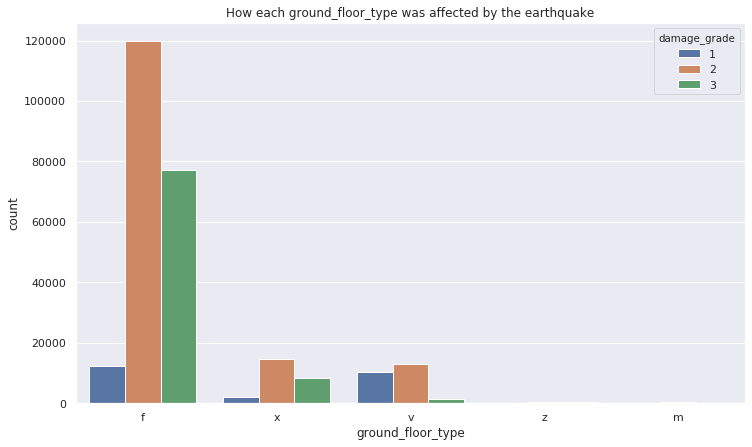

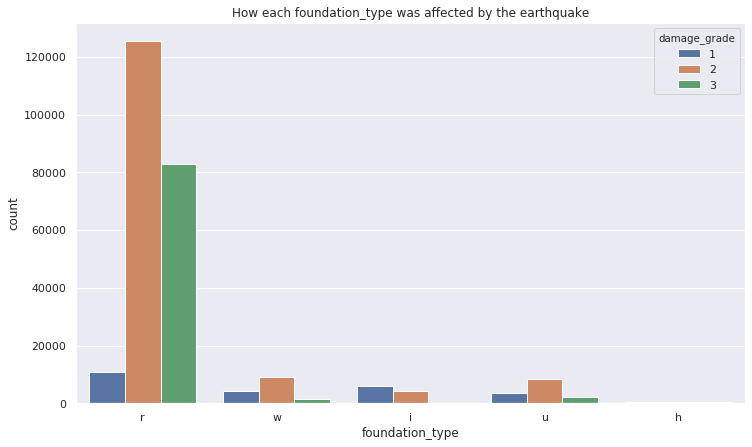

From the above graphs, it is not clear or rather hard to infer about which roof types, foundation types or floor types 
are strong or durable as most of the buildings are moderately and highly damaged


In [0]:
df_merged = train_values.merge(train_labels)

cols = ["other_floor_type", "roof_type", "ground_floor_type", "foundation_type"]
for col in cols:
    sns.countplot(x = col, hue = "damage_grade" , data = df_merged).set_title("How each "+col+" was affected by the earthquake")
    plt.show()

print("From the above graphs, it is not clear or rather hard to infer about which roof types, foundation types or floor types \nare strong or durable as most of the buildings are moderately and highly damaged")

for the plots below, legend shows a value of 0, this is only due to a bug in the sns.scatterplot() function.


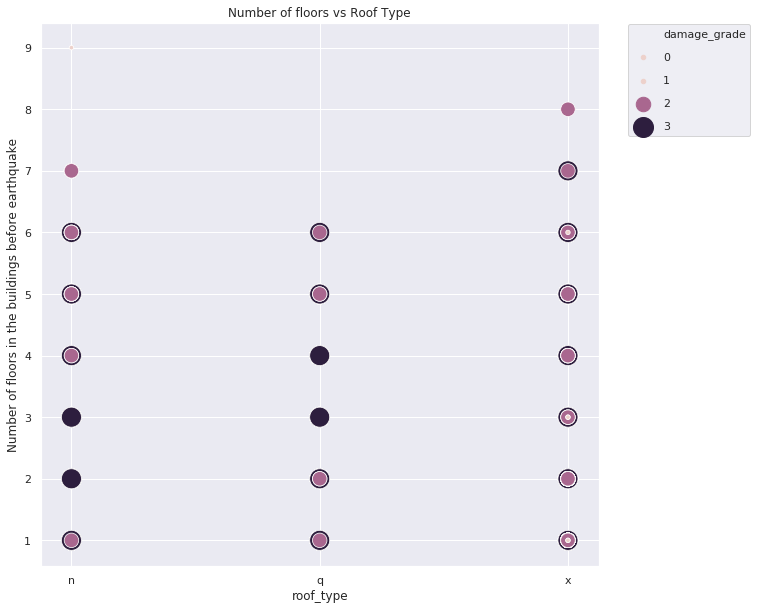

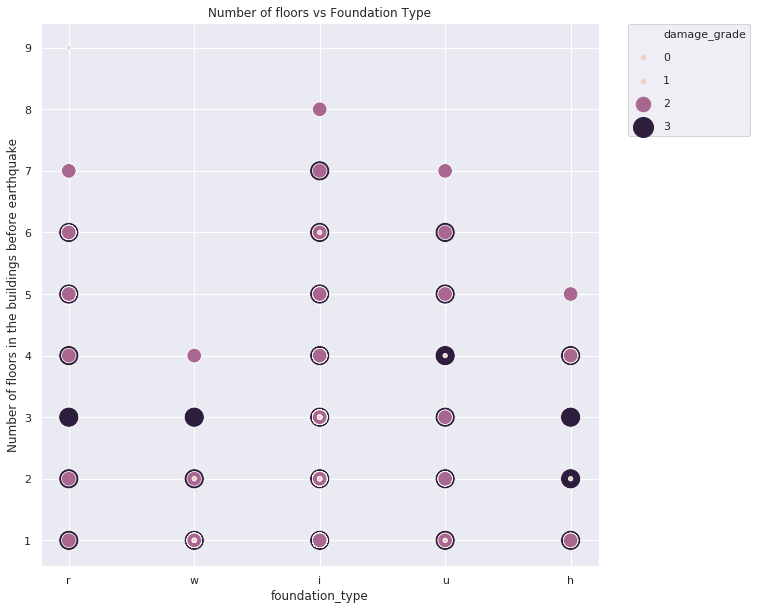

There is no clear pattern or relationship observed in between the amount of damage caused and the floors of the building
But it is observed that most of the buildings of roof_type 'x' and foundation_type 'i' have not suffered high damage 
But from the bar plots above, it can be seen that not many such buildings of roof_type 'x' and foundation_type 'i' exist

 It can also be observed from both the plots, buildings having 3 or 4 floors seem to be more highly damaged than the other buildings



In [38]:
print("for the plots below, legend shows a value of 0, this is only due to a bug in the sns.scatterplot() function.")

sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = "roof_type", y = "count_floors_pre_eq", data = df_merged, hue = "damage_grade", size = "damage_grade", sizes=(20, 400))
plt.ylabel("Number of floors in the buildings before earthquake")
plt.title("Number of floors vs Roof Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, labelspacing=1.2)
plt.show()

sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = "foundation_type", y = "count_floors_pre_eq", data = df_merged, hue = "damage_grade", size = "damage_grade", sizes=(20, 400))
plt.ylabel("Number of floors in the buildings before earthquake")
plt.title("Number of floors vs Foundation Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, labelspacing=1.2)
plt.show()

print("There is no clear pattern or relationship observed in between the amount of damage caused and the floors of the building")
print("But it is observed that most of the buildings of roof_type 'x' and foundation_type 'i' have not suffered high damage ")
print("But from the bar plots above, it can be seen that not many such buildings of roof_type 'x' and foundation_type 'i' exist")
print("\n It can also be observed from both the plots, buildings having 3 or 4 floors seem to be more highly damaged than the other buildings\n")

## Basic Models
1. Logistic Regression
2. Random Forest

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df, train_labels['damage_grade'], test_size=0.3) # 70% training and 30% test
X_train = X_train.drop(columns = 'building_id')
X_test  = X_test.drop (columns = 'building_id')

### Logistic Regression

In [0]:
# Logistic Regression Model
# Training the model using training sets and using it to make predictions
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy of Logistic Regression: ",clf.score(X_test, y_test))

Accuracy of Logistic Regression:  0.5658408053107532


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


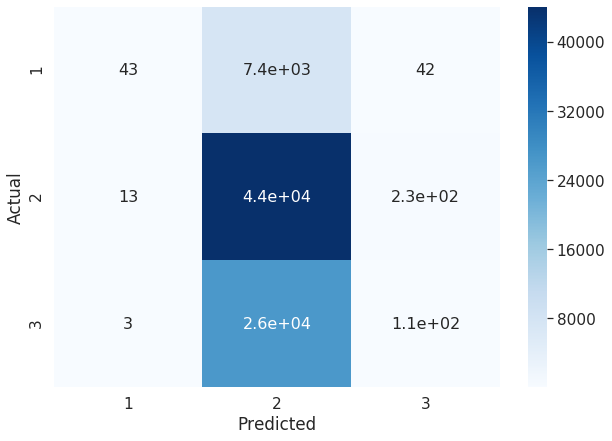

In [0]:
print_confusion_matrix(y_test, y_pred)

### Random Forest

In [0]:
# Random Forest Classifier Model
model, y_pred = random_forest_classifier(X_train,y_train,X_test,y_test)

Accuracy of RandomForestClassifier: 0.719637763651015


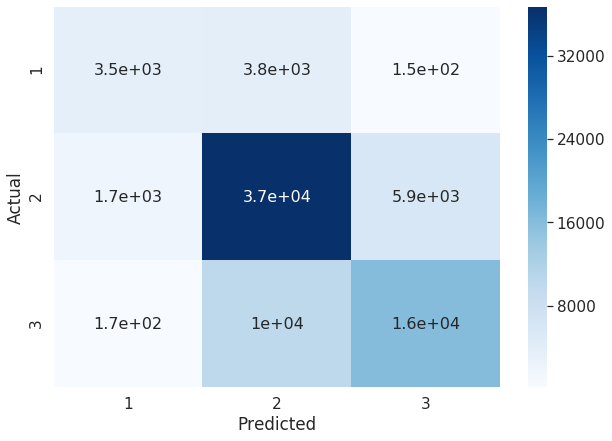

In [0]:
print_confusion_matrix(y_test, y_pred)